In [ ]:
import tensorflow as tf
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,GlobalAveragePooling2D,Dropout
tf.__version__

'2.11.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Computer Vision Masterclass/Datasets/homer_bart_2.zip"
zip_object = zipfile.ZipFile(file = path,mode= 'r')
zip_object.extractall('./')
zip_object.close()

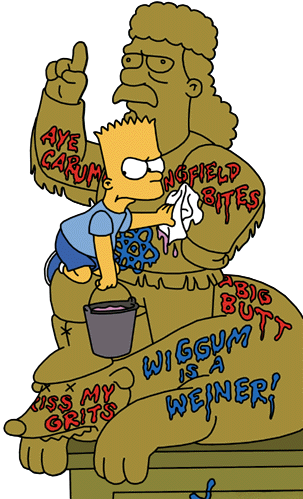

In [ ]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart101.bmp')

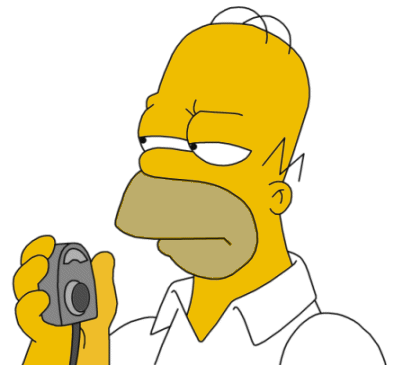

In [ ]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/homer/homer104.bmp')

In [ ]:
training_geenrator = ImageDataGenerator(rescale= 1./255,rotation_range = 7, horizontal_flip= True, zoom_range = 0.2)
train_dataset = training_geenrator.flow_from_directory('/content/homer_bart_2/training_set', target_size = (256,256), batch_size = 8, class_mode = 'categorical',shuffle = True)

Found 215 images belonging to 2 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
test_geenrator = ImageDataGenerator(rescale= 1./255)
test_dataset = training_geenrator.flow_from_directory('/content/homer_bart_2/test_set', target_size = (256,256), batch_size = 1, class_mode = 'categorical',shuffle = False)

Found 54 images belonging to 2 classes.


In [ ]:
base_model = tf.keras.applications.ResNet50(weights= 'imagenet',include_top = False,input_tensor = Input(shape = (256,256,3))) #include_top = false will remove the final dense layers from the achitecture

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
 len(base_model.layers)

175

In [ ]:
for layer in base_model.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f01365e8af0> True
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f01365e8e50> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f01365d2040> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f01365e8940> True
<keras.layers.core.activation.Activation object at 0x7f0136595430> True
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f01365585b0> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f01240ecca0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f0136558ee0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f01240f3a90> True
<keras.layers.core.activation.Activation object at 0x7f01240fed60> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f01240f9850> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f01240f9880> True
<keras.layers.core.activati

In [ ]:
#this is to make sure that the existing weights wont change during the training process
for layer in base_model.layers:
   layer.trainable = False

In [ ]:
for layer in base_model.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f01365e8af0> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f01365e8e50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f01365d2040> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f01365e8940> False
<keras.layers.core.activation.Activation object at 0x7f0136595430> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f01365585b0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f01240ecca0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f0136558ee0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f01240f3a90> False
<keras.layers.core.activation.Activation object at 0x7f01240fed60> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f01240f9850> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f01240f9880> False
<keras.layers.c

In [ ]:
base_model.output

<KerasTensor: shape=(None, 8, 8, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [ ]:
head_model = base_model.output
head_model = GlobalAveragePooling2D()(head_model) #does the similar job as flatten layer
head_model = Dense(units = 1025, activation = 'relu')(head_model)
head_model = Dropout(rate = 0.2)(head_model)
head_model = Dense(units = 1025, activation = 'relu')(head_model)
head_model = Dropout(rate = 0.2)(head_model)
head_model = Dense(2,activation ='softmax')(head_model)

In [ ]:
base_model.input

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
network = Model(inputs = base_model.input, outputs = head_model)

In [ ]:
network.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

since we used GlobalAveragePooling2D the number of neurons is 2048, if we had used Flatten then it would have mulitplied 8*8*2048

In [ ]:
#Number of hidden layers
(2048+2)/2

1025.0

In [ ]:
network.compile(optimizer = 'Adam',loss= 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = network.fit_generator(train_dataset,epochs = 10)

<ipython-input-35-a99b0533cec6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset,epochs = 10)


Epoch 1/10
27/27 [==============================] - 15s 132ms/step - loss: 1.2037 - accuracy: 0.4930
Epoch 2/10
27/27 [==============================] - 3s 116ms/step - loss: 0.7994 - accuracy: 0.5070
Epoch 3/10
27/27 [==============================] - 4s 166ms/step - loss: 0.6507 - accuracy: 0.6140
Epoch 4/10
27/27 [==============================] - 3s 120ms/step - loss: 0.6581 - accuracy: 0.6326
Epoch 5/10
27/27 [==============================] - 3s 118ms/step - loss: 0.6400 - accuracy: 0.5907
Epoch 6/10
27/27 [==============================] - 3s 125ms/step - loss: 0.6454 - accuracy: 0.5907
Epoch 7/10
27/27 [==============================] - 3s 122ms/step - loss: 0.5951 - accuracy: 0.7116
Epoch 8/10
27/27 [==============================] - 3s 120ms/step - loss: 0.5798 - accuracy: 0.7023
Epoch 9/10
27/27 [==============================] - 6s 232ms/step - loss: 0.5451 - accuracy: 0.7256
Epoch 10/10
27/27 [==============================] - 3s 119ms/step - loss: 0.5855 - accuracy: 0.688

In [ ]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
predictions = network.predict(test_dataset)

54/54 [==============================] - 2s 20ms/step


In [ ]:
predictions

array([[0.88662076, 0.11337925],
       [0.94919235, 0.05080763],
       [0.90737134, 0.09262872],
       [0.9243599 , 0.07564008],
       [0.92291814, 0.07708183],
       [0.9101285 , 0.08987148],
       [0.9134848 , 0.08651517],
       [0.7455412 , 0.25445884],
       [0.82888204, 0.17111798],
       [0.9255589 , 0.07444111],
       [0.6090914 , 0.39090863],
       [0.88079584, 0.11920416],
       [0.93126917, 0.06873082],
       [0.7095811 , 0.29041895],
       [0.8021188 , 0.19788116],
       [0.9396409 , 0.0603592 ],
       [0.5908409 , 0.40915912],
       [0.8282405 , 0.1717595 ],
       [0.8714899 , 0.12851009],
       [0.88502645, 0.11497358],
       [0.74932164, 0.25067833],
       [0.91732913, 0.08267087],
       [0.9431466 , 0.05685342],
       [0.8182149 , 0.18178517],
       [0.9270779 , 0.07292212],
       [0.86764824, 0.13235176],
       [0.9411186 , 0.05888139],
       [0.8407082 , 0.15929182],
       [0.6096171 , 0.39038295],
       [0.84992677, 0.15007327],
       [0.

In [ ]:
predictions = np.argmax(predictions,axis = 1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
accuracy_score(test_dataset.classes,predictions)

0.6111111111111112

In [ ]:
cm = confusion_matrix(test_dataset.classes,predictions)
cm

array([[28,  0],
       [21,  5]])

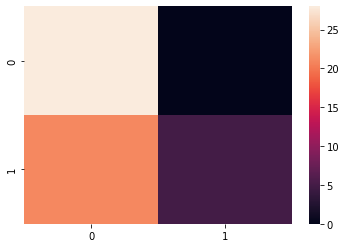

In [ ]:
sns.heatmap(cm)

In [ ]:
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73        28
           1       1.00      0.19      0.32        26

    accuracy                           0.61        54
   macro avg       0.79      0.60      0.52        54
weighted avg       0.78      0.61      0.53        54



## Fine tuning

THe first set of conv layers extract the general features and the last dense layers extract the features related to the objects we are going to classify.It is posisble to train the conv layers in any State of art alogirthms but *make sure that the learning rate parameter is very less* to avoid the disturbancr to the existing weights

In [ ]:
base_model.trainable = True

In [ ]:
for layer in base_model.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f01365e8af0> True
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f01365e8e50> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f01365d2040> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f01365e8940> True
<keras.layers.core.activation.Activation object at 0x7f0136595430> True
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f01365585b0> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f01240ecca0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f0136558ee0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f01240f3a90> True
<keras.layers.core.activation.Activation object at 0x7f01240fed60> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f01240f9850> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f01240f9880> True
<keras.layers.core.activati

In [ ]:
len(base_model.layers)

175

In [ ]:
#this means layers before 140 will be freezed
fine_tuning_at = 140

In [ ]:
for layer in base_model.layers[:fine_tuning_at]:
  layer.trainable = False


In [ ]:
for layer in base_model.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f01365e8af0> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f01365e8e50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f01365d2040> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f01365e8940> False
<keras.layers.core.activation.Activation object at 0x7f0136595430> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f01365585b0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f01240ecca0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f0136558ee0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f01240f3a90> False
<keras.layers.core.activation.Activation object at 0x7f01240fed60> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f01240f9850> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f01240f9880> False
<keras.layers.c

In [ ]:
network.compile(optimizer= 'Adam',loss= 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history = network.fit(train_dataset,epochs = 10)

Epoch 1/10
27/27 [==============================] - 18s 165ms/step - loss: 0.8240 - accuracy: 0.6279
Epoch 2/10
27/27 [==============================] - 5s 171ms/step - loss: 0.7332 - accuracy: 0.5349
Epoch 3/10
27/27 [==============================] - 6s 236ms/step - loss: 0.5725 - accuracy: 0.6791
Epoch 4/10
27/27 [==============================] - 5s 178ms/step - loss: 0.5354 - accuracy: 0.7488
Epoch 5/10
27/27 [==============================] - 3s 120ms/step - loss: 0.5113 - accuracy: 0.7721
Epoch 6/10
27/27 [==============================] - 4s 136ms/step - loss: 0.4495 - accuracy: 0.8093
Epoch 7/10
27/27 [==============================] - 6s 230ms/step - loss: 0.4551 - accuracy: 0.8326
Epoch 8/10
27/27 [==============================] - 5s 175ms/step - loss: 0.3899 - accuracy: 0.7814
Epoch 9/10
27/27 [==============================] - 5s 204ms/step - loss: 0.4185 - accuracy: 0.7814
Epoch 10/10
27/27 [==============================] - 6s 209ms/step - loss: 0.4462 - accuracy: 0.800

In [ ]:
predictions = network.predict(test_dataset)

54/54 [==============================] - 2s 18ms/step


In [ ]:
predictions = np.argmax(predictions , axis = 1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
accuracy_score(test_dataset.classes,predictions)

0.5370370370370371

In ideal scenrio the accuracy after fine tuning will be better because, the images on which the base model is trained is real world object and not characters, by fine tuning we are trining the conv layer to some extend which will increase the accuracy